In [44]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle

sys.path.append('../code')

import wk
import ngk

from sklearn.decomposition import KernelPCA

%matplotlib inline

In [2]:
dataset = pickle.load(open('../dataset/reuters.pkl', 'rb'))

In [59]:
labels = {
    'acq': 0,
    'corn': 1,
    'crude': 2,
    'earn': 3
}

colors = {
    'acq': 'ro',
    'corn': 'bo',
    'crude': 'go',
    'earn': 'yo'
}

In [21]:
X_train = [t[0] for t in dataset['train']]
y_train = np.array([labels[t[1]] for t in dataset['train']])
X_test = [t[0] for t in dataset['test']]
y_test = np.array([labels[t[1]] for t in dataset['test']])

In [67]:
#train_gram, test_gram = wk.wkGmats(X_train, X_test)
train_gram, test_gram = ngk.ngkGmats(X_train, X_test, n=7)

In [69]:
kpca = KernelPCA(kernel='precomputed')

In [70]:
X_kpca = kpca.fit_transform(train_gram)

In [71]:
X_kpca.shape

(380, 374)

In [81]:
def plot(X, y, c=(0,1)):
    for lab in labels.keys():
        plt.plot(X[y == labels[lab], c[0]], X[y == labels[lab], c[1]], colors[lab], label=lab)
    plt.xlabel('{} pc'.format(c[0] + 1))
    plt.ylabel('{} pc'.format(c[1] + 1))
    plt.legend(loc='lower right')
    plt.show()

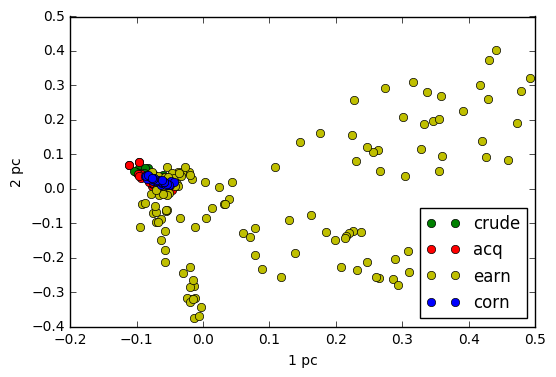

In [88]:
plot(X_kpca, y_train, c=(0, 1))

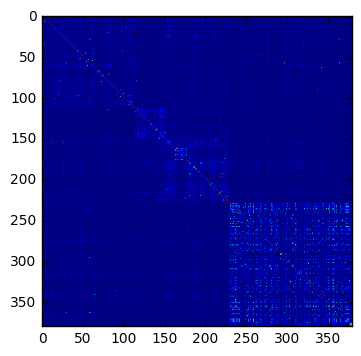

In [89]:
plt.imshow(train_gram)